In [ ]:
# !git clone https://github.com/finterstellar/finterstellar.git

In [ ]:
# !pip uninstall matplotlib
# !pip install matplotlib==3.1.3

In [ ]:
# !pip uninstall scikit-learn

In [ ]:
# !pip install scikit-learn==0.23.2

In [ ]:
# !pip install -U finance-datareader
# !pip install yfinance

In [ ]:
# !pip install pycaret[full] -qqq

In [ ]:
# !pip install finterstellar

In [ ]:
# ta library
# https://technical-analysis-library-in-python.readthedocs.io/en/latest/

# !pip install ta

In [ ]:
from sklearn.cluster import KMeans
import warnings, random
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler

# 데이터 준비

In [ ]:
import FinanceDataReader as fdr

korean_list = fdr.StockListing('Krx')
korean_list

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7926,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7927,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7928,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
7929,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
print(korean_list.loc[korean_list['Name'] == 'POSCO홀딩스'])

      Symbol Market      Name     Sector                  Industry  \
1793  005490  KOSPI  POSCO홀딩스  1차 철강 제조업  열연코일,냉연강판,후판,선재,스테인리스 제조   

     ListingDate SettleMonth            Representative  \
1793  1988-06-10         12월  대표이사 회장 최정우, 대표이사 사장 전중선   

                    HomePage Region  
1793  http://www.posco.co.kr  서울특별시  


In [ ]:
import yfinance as yf
# CJ대한통운 = 000120  
List= yf.download('000120.KS',
                      start='2018-06-01',
                       end = '2022-01-10',
                       action='inline',
                      progress=False)

In [ ]:
data = List

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,149500.0,152500.0,147000.0,148000.0,148000.0,54814
2018-06-04,151500.0,158000.0,151500.0,153000.0,153000.0,108756
2018-06-05,154500.0,154500.0,150500.0,152500.0,152500.0,55147
2018-06-07,152000.0,157500.0,151000.0,154000.0,154000.0,89568
2018-06-08,157000.0,157000.0,151000.0,154000.0,154000.0,99739
...,...,...,...,...,...,...
2022-01-04,129500.0,129500.0,127500.0,129000.0,129000.0,29849
2022-01-05,128000.0,129500.0,126000.0,126500.0,126500.0,59947
2022-01-06,126500.0,127500.0,125000.0,125500.0,125500.0,50687


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2018-06-01 to 2022-01-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       889 non-null    float64
 1   High       889 non-null    float64
 2   Low        889 non-null    float64
 3   Close      889 non-null    float64
 4   Adj Close  889 non-null    float64
 5   Volume     889 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 48.6 KB


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,149500.0,152500.0,147000.0,148000.0,148000.0,54814
2018-06-04,151500.0,158000.0,151500.0,153000.0,153000.0,108756
2018-06-05,154500.0,154500.0,150500.0,152500.0,152500.0,55147
2018-06-07,152000.0,157500.0,151000.0,154000.0,154000.0,89568
2018-06-08,157000.0,157000.0,151000.0,154000.0,154000.0,99739


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,129500.0,129500.0,127500.0,129000.0,129000.0,29849
2022-01-05,128000.0,129500.0,126000.0,126500.0,126500.0,59947
2022-01-06,126500.0,127500.0,125000.0,125500.0,125500.0,50687
2022-01-07,125500.0,127500.0,125000.0,127500.0,127500.0,32423
2022-01-10,126500.0,127500.0,125000.0,126000.0,126000.0,26951


In [ ]:
# Close(종가)는 삭제하고 Adj Close(수정된 종가)를 사용
data.drop(columns = ['Close'], inplace = True)
data.rename(columns = {'Adj Close' : 'Close'}, inplace = True)
# chage(변화량), chage_rate(변화율) 추가
# 변화량
data['Change'] = [data.iloc[i]['Close']-data.iloc[i-1]['Close'] for i in range(len(data))]
# 변화율
data['Change_rate'] = [(data.iloc[i]['Close']-data.iloc[i-1]['Close'])/data.iloc[i-1]['Close']*100 for i in range(len(data))]
data

,Open,High,Low,Close,Volume,Change,Change_rate
Date,,,,,,,
2018-06-01,149500.0,152500.0,147000.0,148000.0,54814,22000.0,17.460317
2018-06-04,151500.0,158000.0,151500.0,153000.0,108756,5000.0,3.378378
2018-06-05,154500.0,154500.0,150500.0,152500.0,55147,-500.0,-0.326797
2018-06-07,152000.0,157500.0,151000.0,154000.0,89568,1500.0,0.983607
2018-06-08,157000.0,157000.0,151000.0,154000.0,99739,0.0,0.000000
...,...,...,...,...,...,...,...
2022-01-04,129500.0,129500.0,127500.0,129000.0,29849,3000.0,2.380952
2022-01-05,128000.0,129500.0,126000.0,126500.0,59947,-2500.0,-1.937984
2022-01-06,126500.0,127500.0,125000.0,125500.0,50687,-1000.0,-0.790514


## 각종지수 feature로 추가

In [ ]:
import pandas as pd
import numpy as np
import ta

### 볼린저 밴드

In [ ]:
# 하이밴드
# ta.volatility.bollinger_hband(close, window=20, window_dev=2, fillna=False)
data['boll_HB'] = ta.volatility.bollinger_hband(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
data['boll_HB_signal'] = ta.volatility.bollinger_hband_indicator(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# 로우밴드
# ta.volatility.bollinger_lband(close, window=20, window_dev=2, fillna=False)
data['boll_LB'] = ta.volatility.bollinger_lband(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
data['boll_LB_signal'] = ta.volatility.bollinger_hband_indicator(data['Close'], window=20, window_dev=2, fillna=False)

### RSI

In [ ]:
# ta.momentum.rsi(close, window=14, fillna=False) → pandas.core.series.Series
data['rsi'] = ta.momentum.rsi(data['Close'])

In [ ]:
data['rsi']

Date
2018-06-01          NaN
2018-06-04          NaN
2018-06-05          NaN
2018-06-07          NaN
2018-06-08          NaN
                ...    
2022-01-04    44.282442
2022-01-05    39.427336
2022-01-06    37.649189
2022-01-07    43.169531
2022-01-10    40.288482
Name: rsi, Length: 889, dtype: float64

In [ ]:
# 30 이하 1 70이상 -1 그 외 0
def make_rissignal(value):
    if value <= 30: 
        return 1
    elif value <= 70:
        return 0
    else:
        return -1


In [ ]:
data['rsi_signal'] = data['rsi'].apply(lambda x : make_rissignal(x))

### 단순이동 평균

In [ ]:
# 단순 이동평균 SMA (Simple Moving Average)
data['sma5'] = data['Close'].rolling(5).mean()
data['sma20'] = data['Close'].rolling(20).mean()
data['sma60'] = data['Close'].rolling(60).mean()
data['sma120'] = data['Close'].rolling(120).mean()

### WMA 가중평균

In [ ]:
# WMA 가중평균
# ta.trend.wma_indicator(close, window=9, fillna=False)
data['WMA'] = ta.trend.wma_indicator(data['Close'], window=9, fillna=False)

### EMV 단순이동

In [ ]:
# EMV 단순이동
# ta.volume.ease_of_movement(high, low, volume, window=14, fillna=False)
data['EMV'] = ta.volume.ease_of_movement(data['High'], data['Low'], data['Volume'], window=14, fillna=False)

### macd

In [ ]:
# macd
# macd = ta.trend.macd(close) 12일 지수이동평균 - 26일 지수이동평균
# macdsignal = ta.trend.macd_signal(close) MACD의 9일 지수이동평균
# ta.trend.MACD(close: pandas.core.series.Series, 
# window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)
data['macd'] = ta.trend.macd(data['Close'])
data['macdsignal'] = ta.trend.macd_signal(data['Close'])

### 모멘텀

In [ ]:
# 모멘텀 awesome_oscillator
# ta.momentum.AwesomeOscillatorIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, window1: int = 5, window2: int = 34, fillna: bool = False)
data['awesome_oscillator'] = ta.momentum.awesome_oscillator(data['High'], data['Low'], 5, 34, False )

### williams_r

In [ ]:
# williams_r
# ta.momentum.williams_r(high, low, close, lbp=14, fillna=False)
data['williams_r'] = ta.momentum.williams_r(data['High'], data['Low'], data['Close'], lbp=14, fillna=False)

## 타겟설정

In [ ]:
# 등락률 : 어제보다 올랐으면 1 그밖은 0
data['upNdown']=[1 if x>0 else 0 for x in data['Change']]
#하루전 등락
data['upNdown_1ago']=data['upNdown'].shift(1)
#이틀전 등락
data['upNdown_2ago']=data['upNdown'].shift(2)

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,sma120,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,149500.0,152500.0,147000.0,148000.0,54814,22000.0,17.460317,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2018-06-04,151500.0,158000.0,151500.0,153000.0,108756,5000.0,3.378378,NaN,0.0,NaN,...,NaN,NaN,2.988341e+10,NaN,NaN,NaN,NaN,1,1.0,NaN
2018-06-05,154500.0,154500.0,150500.0,152500.0,55147,-500.0,-0.326797,NaN,0.0,NaN,...,NaN,NaN,-1.632002e+10,NaN,NaN,NaN,NaN,0,1.0,1.0
2018-06-07,152000.0,157500.0,151000.0,154000.0,89568,1500.0,0.983607,NaN,0.0,NaN,...,NaN,NaN,1.269985e+10,NaN,NaN,NaN,NaN,1,0.0,1.0
2018-06-08,157000.0,157000.0,151000.0,154000.0,99739,0.0,0.000000,NaN,0.0,NaN,...,NaN,NaN,-1.503925e+09,NaN,NaN,NaN,NaN,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,129500.0,129500.0,127500.0,129000.0,29849,3000.0,2.380952,135990.732789,0.0,125209.267211,...,154325.000000,127744.444444,2.010118e+10,-2292.942801,-2320.410524,-4500.000000,-52.173913,1,0.0,1.0
2022-01-05,128000.0,129500.0,126000.0,126500.0,59947,-2500.0,-1.937984,136101.926986,0.0,124748.073014,...,153866.666667,127377.777778,-4.378868e+09,-2309.768162,-2318.282052,-4554.411765,-71.428571,0,1.0,0.0
2022-01-06,126500.0,127500.0,125000.0,125500.0,50687,-1000.0,-0.790514,136165.488391,0.0,124084.511609,...,153404.166667,126877.777778,-7.398347e+09,-2376.400360,-2329.905713,-4244.117647,-80.952381,0,0.0,1.0


In [ ]:
# 내일의 등락률 즉 내일 예측을 위해 하루를 땅김
data['Target']=data['upNdown'].shift(-1)

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,149500.0,152500.0,147000.0,148000.0,54814,22000.0,17.460317,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0
2018-06-04,151500.0,158000.0,151500.0,153000.0,108756,5000.0,3.378378,NaN,0.0,NaN,...,NaN,2.988341e+10,NaN,NaN,NaN,NaN,1,1.0,NaN,0.0
2018-06-05,154500.0,154500.0,150500.0,152500.0,55147,-500.0,-0.326797,NaN,0.0,NaN,...,NaN,-1.632002e+10,NaN,NaN,NaN,NaN,0,1.0,1.0,1.0
2018-06-07,152000.0,157500.0,151000.0,154000.0,89568,1500.0,0.983607,NaN,0.0,NaN,...,NaN,1.269985e+10,NaN,NaN,NaN,NaN,1,0.0,1.0,0.0
2018-06-08,157000.0,157000.0,151000.0,154000.0,99739,0.0,0.000000,NaN,0.0,NaN,...,NaN,-1.503925e+09,NaN,NaN,NaN,NaN,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,129500.0,129500.0,127500.0,129000.0,29849,3000.0,2.380952,135990.732789,0.0,125209.267211,...,127744.444444,2.010118e+10,-2292.942801,-2320.410524,-4500.000000,-52.173913,1,0.0,1.0,0.0
2022-01-05,128000.0,129500.0,126000.0,126500.0,59947,-2500.0,-1.937984,136101.926986,0.0,124748.073014,...,127377.777778,-4.378868e+09,-2309.768162,-2318.282052,-4554.411765,-71.428571,0,1.0,0.0,0.0
2022-01-06,126500.0,127500.0,125000.0,125500.0,50687,-1000.0,-0.790514,136165.488391,0.0,124084.511609,...,126877.777778,-7.398347e+09,-2376.400360,-2329.905713,-4244.117647,-80.952381,0,0.0,1.0,1.0


In [ ]:
# data=data.drop('upNdown',axis=1)
data = data.dropna()

In [ ]:
data=data[22:]

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,169500.0,169500.0,165500.0,167000.0,28950,-1500.0,-0.890208,174074.720840,0.0,153925.279160,...,168066.666667,1.036269e+10,3664.811649,3687.450684,10013.235294,-32.258065,0,1.0,0.0,0.0
2019-01-02,166000.0,168000.0,163000.0,166500.0,35501,-500.0,-0.299401,174233.372077,0.0,154516.627923,...,167655.555556,-2.816822e+10,3407.588722,3631.478292,8616.176471,-37.931034,0,0.0,1.0,0.0
2019-01-03,167000.0,167500.0,162500.0,163000.0,38021,-3500.0,-2.102102,173905.433178,0.0,155494.566822,...,166577.777778,-6.575314e+09,2888.025590,3482.787752,7544.117647,-78.260870,0,0.0,0.0,1.0
2019-01-04,162000.0,164000.0,161000.0,163500.0,34069,500.0,0.306748,173730.091116,0.0,156169.908884,...,165733.333333,-2.201415e+10,2487.934524,3283.817106,6545.588235,-77.272727,1,0.0,0.0,0.0
2019-01-07,166000.0,168500.0,160500.0,162000.0,39074,-1500.0,-0.917431,173152.531240,0.0,157347.468760,...,164766.666667,4.094794e+10,2026.462214,3032.346128,5639.705882,-86.956522,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,126500.0,126500.0,124500.0,126000.0,66720,-500.0,-0.395257,136042.284156,0.0,125357.715844,...,127633.333333,-1.498801e+09,-2492.661081,-2327.277455,-4466.176471,-80.000000,0,1.0,0.0,1.0
2022-01-04,129500.0,129500.0,127500.0,129000.0,29849,3000.0,2.380952,135990.732789,0.0,125209.267211,...,127744.444444,2.010118e+10,-2292.942801,-2320.410524,-4500.000000,-52.173913,1,0.0,1.0,0.0
2022-01-05,128000.0,129500.0,126000.0,126500.0,59947,-2500.0,-1.937984,136101.926986,0.0,124748.073014,...,127377.777778,-4.378868e+09,-2309.768162,-2318.282052,-4554.411765,-71.428571,0,1.0,0.0,0.0


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Change_rate',
       'boll_HB', 'boll_HB_signal', 'boll_LB', 'boll_LB_signal', 'rsi',
       'rsi_signal', 'sma5', 'sma20', 'sma60', 'sma120', 'WMA', 'EMV', 'macd',
       'macdsignal', 'awesome_oscillator', 'williams_r', 'upNdown',
       'upNdown_1ago', 'upNdown_2ago', 'Target'],
      dtype='object')

## 클러스터링

In [ ]:
kmeans_data = data.drop(['upNdown','upNdown_1ago','upNdown_2ago',	'Target'], axis=1)
kmeans = KMeans(n_clusters=8, random_state=42).fit(kmeans_data)
data['cluster'] = kmeans.predict(kmeans_data)


# pycaret

In [ ]:
from pycaret.classification import * 

In [ ]:
# Importing module and initializing setup 

clf = setup(data = data, target='Target', train_size=0.8, silent=True, use_gpu =True)

,Description,Value
0,session_id,7676
1,Target,Target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(745, 28)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# return best model based on AUC 
best = compare_models() #default is 'Accuracy' 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5553,0.5297,0.4222,0.5186,0.4601,0.0891,0.0931,0.296
dummy,Dummy Classifier,0.5469,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.007
nb,Naive Bayes,0.5385,0.5075,0.0593,0.3764,0.0986,-0.0052,0.0097,0.010
ridge,Ridge Classifier,0.5367,0.0000,0.3370,0.4920,0.3964,0.0411,0.0452,0.012
lda,Linear Discriminant Analysis,0.5367,0.5320,0.3407,0.4929,0.3989,0.0419,0.0460,0.018
catboost,CatBoost Classifier,0.5351,0.5335,0.3741,0.4884,0.4214,0.0437,0.0460,2.225
qda,Quadratic Discriminant Analysis,0.5301,0.5124,0.2444,0.4554,0.3162,0.0115,0.0097,0.010
rf,Random Forest Classifier,0.5285,0.5224,0.3926,0.4753,0.4267,0.0335,0.0345,0.879
svm,SVM - Linear Kernel,0.5251,0.0000,0.5185,0.4754,0.4949,0.0484,0.0492,0.010
et,Extra Trees Classifier,0.5236,0.5168,0.4111,0.4738,0.4386,0.0288,0.0295,0.808


In [ ]:
#lda, lr, catboost

## m1

In [ ]:
m1 = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.5477,0.4444,0.5455,0.4898,0.1438,0.1460
1,0.6167,0.5219,0.3333,0.6429,0.4390,0.1901,0.2139
2,0.5500,0.4321,0.3704,0.5000,0.4255,0.0690,0.0711
3,0.5833,0.5297,0.4444,0.5455,0.4898,0.1438,0.1460
4,0.4833,0.4703,0.2963,0.4000,0.3404,-0.0690,-0.0711
5,0.5500,0.5533,0.5185,0.5000,0.5091,0.0940,0.0940
6,0.5932,0.6250,0.3704,0.5882,0.4545,0.1561,0.1668
7,0.5424,0.5231,0.4444,0.5000,0.4706,0.0701,0.0704
8,0.5085,0.5434,0.4815,0.4643,0.4727,0.0127,0.0127


In [ ]:
tuned_m1 = tune_model(m1,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6167,0.5578,0.5926,0.5714,0.5818,0.2282,0.2283
1,0.5500,0.5309,0.4444,0.5000,0.4706,0.0816,0.0821
2,0.5000,0.4624,0.3704,0.4348,0.4000,-0.0239,-0.0241
3,0.5500,0.5455,0.5185,0.5000,0.5091,0.0940,0.0940
4,0.5833,0.5499,0.4815,0.5417,0.5098,0.1497,0.1504
5,0.5333,0.4994,0.5556,0.4839,0.5172,0.0698,0.0704
6,0.5254,0.5243,0.4444,0.4800,0.4615,0.0384,0.0385
7,0.5932,0.6076,0.5185,0.5600,0.5385,0.1758,0.1762
8,0.4915,0.4838,0.5185,0.4516,0.4828,-0.0126,-0.0127


In [ ]:
predict_model(tuned_m1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5302,0.5425,0.4308,0.459,0.4444,0.0382,0.0382


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,...,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_1.0,Target,Label,Score
0,164000.0,164000.0,161000.0,162500.0,34408.0,-1000.0,-0.611621,165710.734375,140839.265625,69.017166,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5919
1,157000.0,159500.0,155000.0,156000.0,69745.0,-2000.0,-1.265823,162115.218750,144234.781250,52.543659,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.5556
2,163500.0,164500.0,161000.0,164000.0,101842.0,500.0,0.305810,165609.343750,158440.656250,53.042217,...,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.8652
3,162500.0,162500.0,159500.0,159500.0,73300.0,-1500.0,-0.931677,176713.781250,150436.218750,42.474403,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.7825
4,143500.0,146500.0,143500.0,145500.0,34966.0,1500.0,1.041667,155758.984375,140441.015625,41.011776,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.8308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,166000.0,169000.0,165000.0,168000.0,29075.0,4000.0,2.439024,185413.046875,160736.953125,42.407852,...,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5462
145,136000.0,139000.0,134500.0,136500.0,64852.0,2000.0,1.486989,149558.546875,134341.453125,38.713211,...,6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.9982
146,151000.0,151500.0,147000.0,147000.0,44615.0,-4000.0,-2.649007,179526.140625,145073.859375,18.218624,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.6623
147,157000.0,161000.0,155000.0,161000.0,108672.0,5500.0,3.536978,163250.875000,138299.125000,64.420341,...,2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.7766


In [ ]:
final_m1 = finalize_model(tuned_m1)
print(final_m1)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=10,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7676, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
predict_model(final_m1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9933,1.0,0.9846,1.0,0.9922,0.9863,0.9864


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,...,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_1.0,Target,Label,Score
0,164000.0,164000.0,161000.0,162500.0,34408.0,-1000.0,-0.611621,165710.734375,140839.265625,69.017166,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8744
1,157000.0,159500.0,155000.0,156000.0,69745.0,-2000.0,-1.265823,162115.218750,144234.781250,52.543659,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.9967
2,163500.0,164500.0,161000.0,164000.0,101842.0,500.0,0.305810,165609.343750,158440.656250,53.042217,...,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.8993
3,162500.0,162500.0,159500.0,159500.0,73300.0,-1500.0,-0.931677,176713.781250,150436.218750,42.474403,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.9186
4,143500.0,146500.0,143500.0,145500.0,34966.0,1500.0,1.041667,155758.984375,140441.015625,41.011776,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.7976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,166000.0,169000.0,165000.0,168000.0,29075.0,4000.0,2.439024,185413.046875,160736.953125,42.407852,...,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.8946
145,136000.0,139000.0,134500.0,136500.0,64852.0,2000.0,1.486989,149558.546875,134341.453125,38.713211,...,6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.9823
146,151000.0,151500.0,147000.0,147000.0,44615.0,-4000.0,-2.649007,179526.140625,145073.859375,18.218624,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.8950
147,157000.0,161000.0,155000.0,161000.0,108672.0,5500.0,3.536978,163250.875000,138299.125000,64.420341,...,2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.9531


In [ ]:
m1_predictions = predict_model(final_m1, data=data)
m1_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9987,1.0,0.997,1.0,0.9985,0.9973,0.9973


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,169500.0,169500.0,165500.0,167000.0,28950,-1500.0,-0.890208,174074.720840,0.0,153925.279160,...,3687.450684,10013.235294,-32.258065,0,1.0,0.0,0.0,2,0.0,0.8885
2019-01-02,166000.0,168000.0,163000.0,166500.0,35501,-500.0,-0.299401,174233.372077,0.0,154516.627923,...,3631.478292,8616.176471,-37.931034,0,0.0,1.0,0.0,1,0.0,0.9123
2019-01-03,167000.0,167500.0,162500.0,163000.0,38021,-3500.0,-2.102102,173905.433178,0.0,155494.566822,...,3482.787752,7544.117647,-78.260870,0,0.0,0.0,1.0,6,1.0,0.9261
2019-01-04,162000.0,164000.0,161000.0,163500.0,34069,500.0,0.306748,173730.091116,0.0,156169.908884,...,3283.817106,6545.588235,-77.272727,1,0.0,0.0,0.0,1,0.0,0.9924
2019-01-07,166000.0,168500.0,160500.0,162000.0,39074,-1500.0,-0.917431,173152.531240,0.0,157347.468760,...,3032.346128,5639.705882,-86.956522,0,1.0,0.0,0.0,7,0.0,0.9532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,126500.0,126500.0,124500.0,126000.0,66720,-500.0,-0.395257,136042.284156,0.0,125357.715844,...,-2327.277455,-4466.176471,-80.000000,0,1.0,0.0,1.0,0,1.0,0.8386
2022-01-04,129500.0,129500.0,127500.0,129000.0,29849,3000.0,2.380952,135990.732789,0.0,125209.267211,...,-2320.410524,-4500.000000,-52.173913,1,0.0,1.0,0.0,2,0.0,0.9924
2022-01-05,128000.0,129500.0,126000.0,126500.0,59947,-2500.0,-1.937984,136101.926986,0.0,124748.073014,...,-2318.282052,-4554.411765,-71.428571,0,1.0,0.0,0.0,6,0.0,0.9762


## m2

In [ ]:
m2 = create_model('dummy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5500,0.5,0.0,0.0,0.0,0.0,0.0
1,0.5500,0.5,0.0,0.0,0.0,0.0,0.0
2,0.5500,0.5,0.0,0.0,0.0,0.0,0.0
3,0.5500,0.5,0.0,0.0,0.0,0.0,0.0
4,0.5500,0.5,0.0,0.0,0.0,0.0,0.0
5,0.5500,0.5,0.0,0.0,0.0,0.0,0.0
6,0.5424,0.5,0.0,0.0,0.0,0.0,0.0
7,0.5424,0.5,0.0,0.0,0.0,0.0,0.0
8,0.5424,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
tuned_m2 = tune_model(m2,choose_better = True)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:29:59
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Dummy Classifier


,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


ValueError: ignored

In [ ]:
predict_model(m2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.5638,0.5,0.0,0.0,0.0,0.0,0.0


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,...,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_1.0,Target,Label,Score
0,164000.0,164000.0,161000.0,162500.0,34408.0,-1000.0,-0.611621,165710.734375,140839.265625,69.017166,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.547
1,157000.0,159500.0,155000.0,156000.0,69745.0,-2000.0,-1.265823,162115.218750,144234.781250,52.543659,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.547
2,163500.0,164500.0,161000.0,164000.0,101842.0,500.0,0.305810,165609.343750,158440.656250,53.042217,...,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.547
3,162500.0,162500.0,159500.0,159500.0,73300.0,-1500.0,-0.931677,176713.781250,150436.218750,42.474403,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.547
4,143500.0,146500.0,143500.0,145500.0,34966.0,1500.0,1.041667,155758.984375,140441.015625,41.011776,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,166000.0,169000.0,165000.0,168000.0,29075.0,4000.0,2.439024,185413.046875,160736.953125,42.407852,...,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.547
145,136000.0,139000.0,134500.0,136500.0,64852.0,2000.0,1.486989,149558.546875,134341.453125,38.713211,...,6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.547
146,151000.0,151500.0,147000.0,147000.0,44615.0,-4000.0,-2.649007,179526.140625,145073.859375,18.218624,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.547
147,157000.0,161000.0,155000.0,161000.0,108672.0,5500.0,3.536978,163250.875000,138299.125000,64.420341,...,2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.547


In [ ]:
final_m2 = finalize_model(m2)
print(final_m2)

DummyClassifier(constant=None, random_state=7676, strategy='prior')


In [ ]:
predict_model(final_m2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.5638,0.5,0.0,0.0,0.0,0.0,0.0


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,...,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_1.0,Target,Label,Score
0,164000.0,164000.0,161000.0,162500.0,34408.0,-1000.0,-0.611621,165710.734375,140839.265625,69.017166,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5503
1,157000.0,159500.0,155000.0,156000.0,69745.0,-2000.0,-1.265823,162115.218750,144234.781250,52.543659,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5503
2,163500.0,164500.0,161000.0,164000.0,101842.0,500.0,0.305810,165609.343750,158440.656250,53.042217,...,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5503
3,162500.0,162500.0,159500.0,159500.0,73300.0,-1500.0,-0.931677,176713.781250,150436.218750,42.474403,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5503
4,143500.0,146500.0,143500.0,145500.0,34966.0,1500.0,1.041667,155758.984375,140441.015625,41.011776,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,166000.0,169000.0,165000.0,168000.0,29075.0,4000.0,2.439024,185413.046875,160736.953125,42.407852,...,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5503
145,136000.0,139000.0,134500.0,136500.0,64852.0,2000.0,1.486989,149558.546875,134341.453125,38.713211,...,6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5503
146,151000.0,151500.0,147000.0,147000.0,44615.0,-4000.0,-2.649007,179526.140625,145073.859375,18.218624,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5503
147,157000.0,161000.0,155000.0,161000.0,108672.0,5500.0,3.536978,163250.875000,138299.125000,64.420341,...,2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.5503


In [ ]:
m2_predictions = predict_model(final_m2, data=data)
m2_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.5503,0.5,0.0,0.0,0.0,0.0,0.0


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,169500.0,169500.0,165500.0,167000.0,28950,-1500.0,-0.890208,174074.720840,0.0,153925.279160,...,3687.450684,10013.235294,-32.258065,0,1.0,0.0,0.0,2,0.0,0.5503
2019-01-02,166000.0,168000.0,163000.0,166500.0,35501,-500.0,-0.299401,174233.372077,0.0,154516.627923,...,3631.478292,8616.176471,-37.931034,0,0.0,1.0,0.0,1,0.0,0.5503
2019-01-03,167000.0,167500.0,162500.0,163000.0,38021,-3500.0,-2.102102,173905.433178,0.0,155494.566822,...,3482.787752,7544.117647,-78.260870,0,0.0,0.0,1.0,6,0.0,0.5503
2019-01-04,162000.0,164000.0,161000.0,163500.0,34069,500.0,0.306748,173730.091116,0.0,156169.908884,...,3283.817106,6545.588235,-77.272727,1,0.0,0.0,0.0,1,0.0,0.5503
2019-01-07,166000.0,168500.0,160500.0,162000.0,39074,-1500.0,-0.917431,173152.531240,0.0,157347.468760,...,3032.346128,5639.705882,-86.956522,0,1.0,0.0,0.0,7,0.0,0.5503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,126500.0,126500.0,124500.0,126000.0,66720,-500.0,-0.395257,136042.284156,0.0,125357.715844,...,-2327.277455,-4466.176471,-80.000000,0,1.0,0.0,1.0,0,0.0,0.5503
2022-01-04,129500.0,129500.0,127500.0,129000.0,29849,3000.0,2.380952,135990.732789,0.0,125209.267211,...,-2320.410524,-4500.000000,-52.173913,1,0.0,1.0,0.0,2,0.0,0.5503
2022-01-05,128000.0,129500.0,126000.0,126500.0,59947,-2500.0,-1.937984,136101.926986,0.0,124748.073014,...,-2318.282052,-4554.411765,-71.428571,0,1.0,0.0,0.0,6,0.0,0.5503


## m3

In [ ]:
m3 = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5500,0.4388,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.5667,0.4680,0.0741,0.6667,0.1333,0.0476,0.0999
2,0.5500,0.6094,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.5833,0.5084,0.1111,0.7500,0.1935,0.0876,0.1612
4,0.4667,0.4804,0.1111,0.2727,0.1579,-0.1388,-0.1688
5,0.5833,0.5253,0.0741,1.0000,0.1379,0.0809,0.2053
6,0.5085,0.4896,0.1111,0.3750,0.1714,-0.0478,-0.0657
7,0.5424,0.5370,0.0741,0.5000,0.1290,0.0124,0.0229
8,0.5424,0.5810,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
tuned_m3 = tune_model(m3,choose_better = True  )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5500,0.4411,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.5667,0.4680,0.0741,0.6667,0.1333,0.0476,0.0999
2,0.5500,0.5948,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.5667,0.5084,0.1111,0.6000,0.1875,0.0545,0.0909
4,0.4667,0.4792,0.1111,0.2727,0.1579,-0.1388,-0.1688
5,0.5833,0.5331,0.0741,1.0000,0.1379,0.0809,0.2053
6,0.5254,0.4838,0.1481,0.4444,0.2222,-0.0085,-0.0112
7,0.5424,0.5324,0.0741,0.5000,0.1290,0.0124,0.0229
8,0.5424,0.5856,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
predict_model(tuned_m3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5705,0.5425,0.0769,0.5556,0.1351,0.0325,0.061


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,...,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_1.0,Target,Label,Score
0,164000.0,164000.0,161000.0,162500.0,34408.0,-1000.0,-0.611621,165710.734375,140839.265625,69.017166,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5667
1,157000.0,159500.0,155000.0,156000.0,69745.0,-2000.0,-1.265823,162115.218750,144234.781250,52.543659,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5695
2,163500.0,164500.0,161000.0,164000.0,101842.0,500.0,0.305810,165609.343750,158440.656250,53.042217,...,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5689
3,162500.0,162500.0,159500.0,159500.0,73300.0,-1500.0,-0.931677,176713.781250,150436.218750,42.474403,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5699
4,143500.0,146500.0,143500.0,145500.0,34966.0,1500.0,1.041667,155758.984375,140441.015625,41.011776,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,166000.0,169000.0,165000.0,168000.0,29075.0,4000.0,2.439024,185413.046875,160736.953125,42.407852,...,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5689
145,136000.0,139000.0,134500.0,136500.0,64852.0,2000.0,1.486989,149558.546875,134341.453125,38.713211,...,6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5534
146,151000.0,151500.0,147000.0,147000.0,44615.0,-4000.0,-2.649007,179526.140625,145073.859375,18.218624,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5096
147,157000.0,161000.0,155000.0,161000.0,108672.0,5500.0,3.536978,163250.875000,138299.125000,64.420341,...,2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.5654


In [ ]:
final_m3 = finalize_model(tuned_m3)
print(final_m3)

GaussianNB(priors=None, var_smoothing=1e-09)


In [ ]:
predict_model(final_m3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5638,0.4744,0.0,0.0,0.0,0.0,0.0


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,...,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_1.0,Target,Label,Score
0,164000.0,164000.0,161000.0,162500.0,34408.0,-1000.0,-0.611621,165710.734375,140839.265625,69.017166,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5461
1,157000.0,159500.0,155000.0,156000.0,69745.0,-2000.0,-1.265823,162115.218750,144234.781250,52.543659,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5398
2,163500.0,164500.0,161000.0,164000.0,101842.0,500.0,0.305810,165609.343750,158440.656250,53.042217,...,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5358
3,162500.0,162500.0,159500.0,159500.0,73300.0,-1500.0,-0.931677,176713.781250,150436.218750,42.474403,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5365
4,143500.0,146500.0,143500.0,145500.0,34966.0,1500.0,1.041667,155758.984375,140441.015625,41.011776,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,166000.0,169000.0,165000.0,168000.0,29075.0,4000.0,2.439024,185413.046875,160736.953125,42.407852,...,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5426
145,136000.0,139000.0,134500.0,136500.0,64852.0,2000.0,1.486989,149558.546875,134341.453125,38.713211,...,6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5431
146,151000.0,151500.0,147000.0,147000.0,44615.0,-4000.0,-2.649007,179526.140625,145073.859375,18.218624,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5764
147,157000.0,161000.0,155000.0,161000.0,108672.0,5500.0,3.536978,163250.875000,138299.125000,64.420341,...,2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.5467


In [ ]:
m3_predictions = predict_model(final_m3, data=data)
m3_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5517,0.4816,0.003,1.0,0.006,0.0033,0.0406


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,169500.0,169500.0,165500.0,167000.0,28950,-1500.0,-0.890208,174074.720840,0.0,153925.279160,...,3687.450684,10013.235294,-32.258065,0,1.0,0.0,0.0,2,0.0,0.5426
2019-01-02,166000.0,168000.0,163000.0,166500.0,35501,-500.0,-0.299401,174233.372077,0.0,154516.627923,...,3631.478292,8616.176471,-37.931034,0,0.0,1.0,0.0,1,0.0,0.5779
2019-01-03,167000.0,167500.0,162500.0,163000.0,38021,-3500.0,-2.102102,173905.433178,0.0,155494.566822,...,3482.787752,7544.117647,-78.260870,0,0.0,0.0,1.0,6,0.0,0.5381
2019-01-04,162000.0,164000.0,161000.0,163500.0,34069,500.0,0.306748,173730.091116,0.0,156169.908884,...,3283.817106,6545.588235,-77.272727,1,0.0,0.0,0.0,1,0.0,0.5615
2019-01-07,166000.0,168500.0,160500.0,162000.0,39074,-1500.0,-0.917431,173152.531240,0.0,157347.468760,...,3032.346128,5639.705882,-86.956522,0,1.0,0.0,0.0,7,0.0,0.6280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,126500.0,126500.0,124500.0,126000.0,66720,-500.0,-0.395257,136042.284156,0.0,125357.715844,...,-2327.277455,-4466.176471,-80.000000,0,1.0,0.0,1.0,0,0.0,0.5355
2022-01-04,129500.0,129500.0,127500.0,129000.0,29849,3000.0,2.380952,135990.732789,0.0,125209.267211,...,-2320.410524,-4500.000000,-52.173913,1,0.0,1.0,0.0,2,0.0,0.5589
2022-01-05,128000.0,129500.0,126000.0,126500.0,59947,-2500.0,-1.937984,136101.926986,0.0,124748.073014,...,-2318.282052,-4554.411765,-71.428571,0,1.0,0.0,0.0,6,0.0,0.5364


# Backtesting

In [ ]:
import finterstellar as fs

In [ ]:
from finterstellar import util
from matplotlib.ticker import ScalarFormatter, FixedLocator
import matplotlib.pyplot as plt

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(15,10))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

## m1


In [ ]:
m1_predictions['Label'] = m1_predictions['Label'].astype(float)

In [ ]:
m1_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,158039.597315,160122.818792,155691.275168,157910.067114,6.702245e+04,-55.033557,-0.019196,167434.791429,0.048322,149355.074343,...,-219.444813,-594.206475,-52.566999,0.449664,0.449664,0.449664,0.449664,2.765101,0.448322,0.936054
std,15814.494248,15808.540808,15566.152335,15743.191671,8.094975e+04,2989.057918,1.911574,15612.573755,0.214590,14622.860105,...,2635.964479,7174.976134,28.871939,0.497794,0.497794,0.497794,0.497794,2.643691,0.497656,0.063065
min,113000.000000,120500.000000,110000.000000,118500.000000,1.466500e+04,-14500.000000,-10.622711,135760.275899,0.000000,118373.568780,...,-5464.761681,-15882.352941,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.583000
25%,145500.000000,147500.000000,143500.000000,145500.000000,3.630300e+04,-2000.000000,-1.159420,154412.578190,0.000000,138194.778154,...,-2228.922359,-5875.000000,-78.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.909900
50%,159000.000000,161000.000000,157000.000000,159500.000000,5.180600e+04,0.000000,0.000000,167911.788882,0.000000,151249.092030,...,-666.704225,-1026.470588,-52.631579,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.955700
75%,169500.000000,171000.000000,167500.000000,169500.000000,7.505600e+04,1500.000000,1.000000,179675.773975,0.000000,160928.785061,...,1857.479739,4317.647059,-28.571429,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.982400
max,193000.000000,195000.000000,189000.000000,190500.000000,1.884952e+06,15500.000000,9.230769,196940.309565,1.000000,178158.813758,...,6120.125461,19216.176471,-0.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.999800


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m1_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03     buy
2019-01-04    zero
2019-01-07    zero
              ... 
2021-12-30     buy
2022-01-04    zero
2022-01-05    zero
2022-01-06     buy
2022-01-07    zero
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m1_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zl
2019-01-04    lz
2019-01-07    zz
              ..
2021-12-30    zl
2022-01-04    lz
2022-01-05    zz
2022-01-06    zl
2022-01-07    lz
Name: position, Length: 745, dtype: object

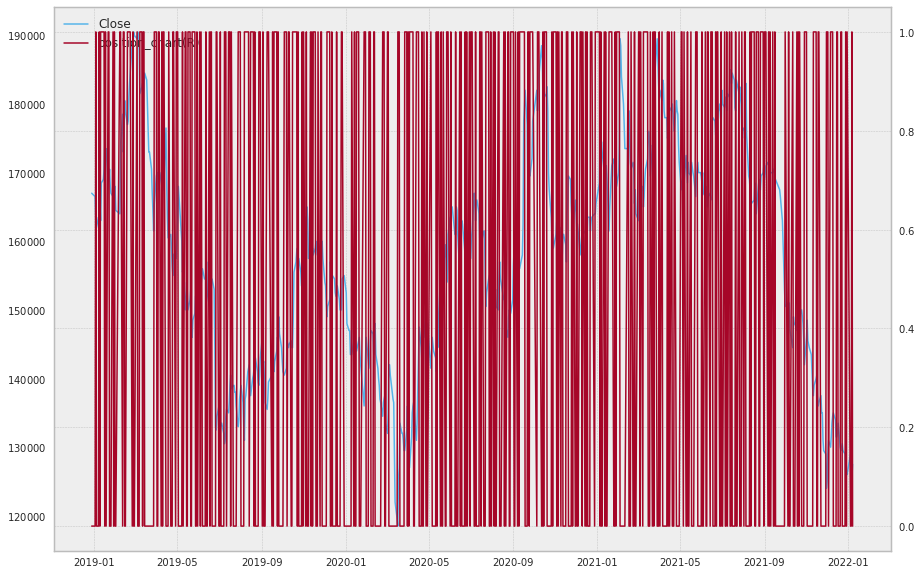

In [ ]:
draw_chart(m1_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m1_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,169500.0,169500.0,165500.0,167000.0,28950,-1500.0,-0.890208,174074.720840,0.0,153925.279160,...,0.8885,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-02,166000.0,168000.0,163000.0,166500.0,35501,-500.0,-0.299401,174233.372077,0.0,154516.627923,...,0.9123,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,0.9794
2019-01-03,167000.0,167500.0,162500.0,163000.0,38021,-3500.0,-2.102102,173905.433178,0.0,155494.566822,...,0.9261,buy,zl,1,1.000000,1.000000,1.000000,0.00,1.0000,0.9853
2019-01-04,162000.0,164000.0,161000.0,163500.0,34069,500.0,0.306748,173730.091116,0.0,156169.908884,...,0.9924,zero,lz,0,0.967829,0.967829,0.967829,-3.22,0.9678,0.9558
2019-01-07,166000.0,168500.0,160500.0,162000.0,39074,-1500.0,-0.917431,173152.531240,0.0,157347.468760,...,0.9532,zero,zz,0,1.000000,1.000000,0.967829,-3.22,0.9678,0.9794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,126500.0,126500.0,124500.0,126000.0,66720,-500.0,-0.395257,136042.284156,0.0,125357.715844,...,0.8386,buy,zl,1,1.000000,1.000000,0.919455,-8.05,0.5942,0.6554
2022-01-04,129500.0,129500.0,127500.0,129000.0,29849,3000.0,2.380952,135990.732789,0.0,125209.267211,...,0.9924,zero,lz,0,1.021361,1.021361,0.939095,-6.09,0.6069,0.6710
2022-01-05,128000.0,129500.0,126000.0,126500.0,59947,-2500.0,-1.937984,136101.926986,0.0,124748.073014,...,0.9762,zero,zz,0,1.000000,1.000000,0.939095,-6.09,0.6069,0.6632


In [ ]:
# 무위험 수익률
fs.performance(m1_predictions, rf_rate=0.02)

CAGR: -2.38%
Accumulated return: -7.05%
Average return: 0.00%
Benchmark return : -25.96%
Number of trades: 193
Number of win: 84
Hit ratio: 43.52%
Investment period: 3.0yrs
Sharpe ratio: -0.17
MDD: -42.15%
Benchmark MDD: -40.68%


## m2

In [ ]:
m2_predictions['Label'] = m2_predictions['Label'].astype(float)

In [ ]:
m2_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.0,7.450000e+02
mean,158039.597315,160122.818792,155691.275168,157910.067114,6.702245e+04,-55.033557,-0.019196,167434.791429,0.048322,149355.074343,...,-219.444813,-594.206475,-52.566999,0.449664,0.449664,0.449664,0.449664,2.765101,0.0,5.503000e-01
std,15814.494248,15808.540808,15566.152335,15743.191671,8.094975e+04,2989.057918,1.911574,15612.573755,0.214590,14622.860105,...,2635.964479,7174.976134,28.871939,0.497794,0.497794,0.497794,0.497794,2.643691,0.0,5.999232e-15
min,113000.000000,120500.000000,110000.000000,118500.000000,1.466500e+04,-14500.000000,-10.622711,135760.275899,0.000000,118373.568780,...,-5464.761681,-15882.352941,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.503000e-01
25%,145500.000000,147500.000000,143500.000000,145500.000000,3.630300e+04,-2000.000000,-1.159420,154412.578190,0.000000,138194.778154,...,-2228.922359,-5875.000000,-78.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.503000e-01
50%,159000.000000,161000.000000,157000.000000,159500.000000,5.180600e+04,0.000000,0.000000,167911.788882,0.000000,151249.092030,...,-666.704225,-1026.470588,-52.631579,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,5.503000e-01
75%,169500.000000,171000.000000,167500.000000,169500.000000,7.505600e+04,1500.000000,1.000000,179675.773975,0.000000,160928.785061,...,1857.479739,4317.647059,-28.571429,1.000000,1.000000,1.000000,1.000000,6.000000,0.0,5.503000e-01
max,193000.000000,195000.000000,189000.000000,190500.000000,1.884952e+06,15500.000000,9.230769,196940.309565,1.000000,178158.813758,...,6120.125461,19216.176471,-0.000000,1.000000,1.000000,1.000000,1.000000,7.000000,0.0,5.503000e-01


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m2_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
              ... 
2021-12-30    zero
2022-01-04    zero
2022-01-05    zero
2022-01-06    zero
2022-01-07    zero
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m2_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
              ..
2021-12-30    zz
2022-01-04    zz
2022-01-05    zz
2022-01-06    zz
2022-01-07    zz
Name: position, Length: 745, dtype: object

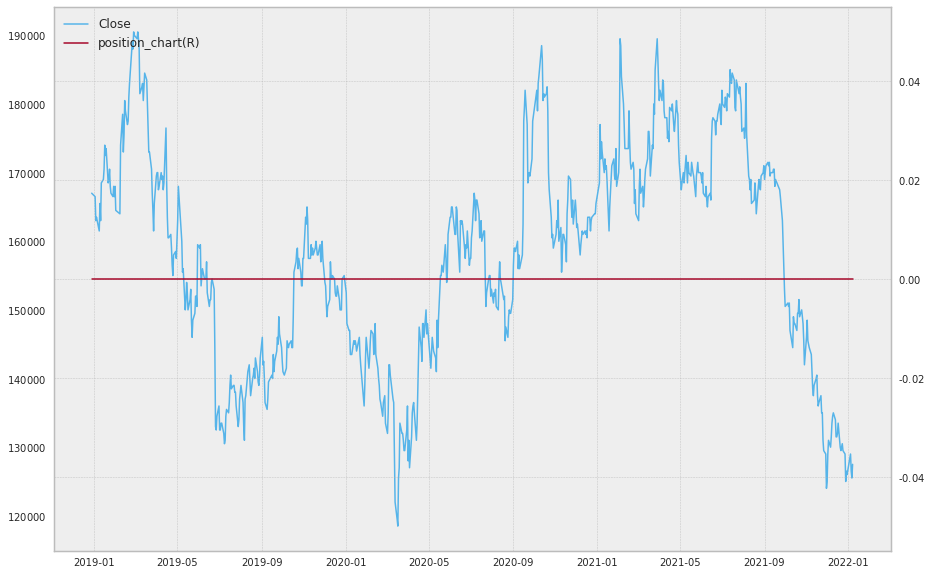

In [ ]:
draw_chart(m2_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m2_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,169500.0,169500.0,165500.0,167000.0,28950,-1500.0,-0.890208,174074.720840,0.0,153925.279160,...,0.5503,zero,,0,1.0,1,1,0,1.0,1.0000
2019-01-02,166000.0,168000.0,163000.0,166500.0,35501,-500.0,-0.299401,174233.372077,0.0,154516.627923,...,0.5503,zero,zz,0,1.0,1,1,0,1.0,0.9794
2019-01-03,167000.0,167500.0,162500.0,163000.0,38021,-3500.0,-2.102102,173905.433178,0.0,155494.566822,...,0.5503,zero,zz,0,1.0,1,1,0,1.0,0.9853
2019-01-04,162000.0,164000.0,161000.0,163500.0,34069,500.0,0.306748,173730.091116,0.0,156169.908884,...,0.5503,zero,zz,0,1.0,1,1,0,1.0,0.9558
2019-01-07,166000.0,168500.0,160500.0,162000.0,39074,-1500.0,-0.917431,173152.531240,0.0,157347.468760,...,0.5503,zero,zz,0,1.0,1,1,0,1.0,0.9794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,126500.0,126500.0,124500.0,126000.0,66720,-500.0,-0.395257,136042.284156,0.0,125357.715844,...,0.5503,zero,zz,0,1.0,1,1,0,1.0,0.6554
2022-01-04,129500.0,129500.0,127500.0,129000.0,29849,3000.0,2.380952,135990.732789,0.0,125209.267211,...,0.5503,zero,zz,0,1.0,1,1,0,1.0,0.6710
2022-01-05,128000.0,129500.0,126000.0,126500.0,59947,-2500.0,-1.937984,136101.926986,0.0,124748.073014,...,0.5503,zero,zz,0,1.0,1,1,0,1.0,0.6632


In [ ]:
# 무위험 수익률
fs.performance(m2_predictions, rf_rate=0.02)

CAGR: 0.00%
Accumulated return: 0.00%
Average return: nan%
Benchmark return : -25.96%
Number of trades: 0
Number of win: 0
Hit ratio: 0.00%
Investment period: 3.0yrs
Sharpe ratio: 0.00
MDD: 0.00%
Benchmark MDD: -40.68%


## m3

In [ ]:
m3_predictions['Label'] = m3_predictions['Label'].astype(float)

In [ ]:
m3_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,158039.597315,160122.818792,155691.275168,157910.067114,6.702245e+04,-55.033557,-0.019196,167434.791429,0.048322,149355.074343,...,-219.444813,-594.206475,-52.566999,0.449664,0.449664,0.449664,0.449664,2.765101,0.001342,0.551608
std,15814.494248,15808.540808,15566.152335,15743.191671,8.094975e+04,2989.057918,1.911574,15612.573755,0.214590,14622.860105,...,2635.964479,7174.976134,28.871939,0.497794,0.497794,0.497794,0.497794,2.643691,0.036637,0.033176
min,113000.000000,120500.000000,110000.000000,118500.000000,1.466500e+04,-14500.000000,-10.622711,135760.275899,0.000000,118373.568780,...,-5464.761681,-15882.352941,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.511300
25%,145500.000000,147500.000000,143500.000000,145500.000000,3.630300e+04,-2000.000000,-1.159420,154412.578190,0.000000,138194.778154,...,-2228.922359,-5875.000000,-78.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.536900
50%,159000.000000,161000.000000,157000.000000,159500.000000,5.180600e+04,0.000000,0.000000,167911.788882,0.000000,151249.092030,...,-666.704225,-1026.470588,-52.631579,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.540400
75%,169500.000000,171000.000000,167500.000000,169500.000000,7.505600e+04,1500.000000,1.000000,179675.773975,0.000000,160928.785061,...,1857.479739,4317.647059,-28.571429,1.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.552500
max,193000.000000,195000.000000,189000.000000,190500.000000,1.884952e+06,15500.000000,9.230769,196940.309565,1.000000,178158.813758,...,6120.125461,19216.176471,-0.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.999800


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m3_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
              ... 
2021-12-30    zero
2022-01-04    zero
2022-01-05    zero
2022-01-06    zero
2022-01-07    zero
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m3_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
              ..
2021-12-30    zz
2022-01-04    zz
2022-01-05    zz
2022-01-06    zz
2022-01-07    zz
Name: position, Length: 745, dtype: object

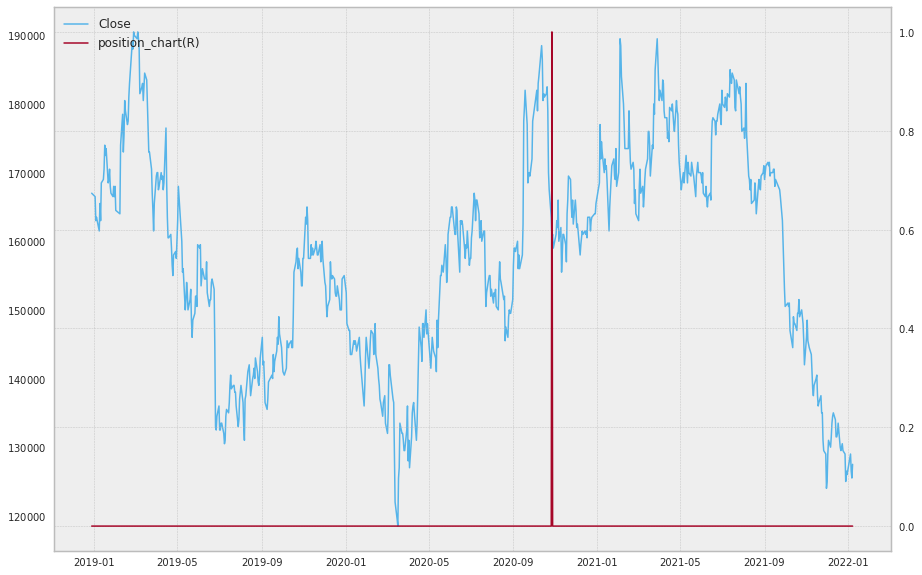

In [ ]:
draw_chart(m3_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m3_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,169500.0,169500.0,165500.0,167000.0,28950,-1500.0,-0.890208,174074.720840,0.0,153925.279160,...,0.5426,zero,,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-02,166000.0,168000.0,163000.0,166500.0,35501,-500.0,-0.299401,174233.372077,0.0,154516.627923,...,0.5779,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9794
2019-01-03,167000.0,167500.0,162500.0,163000.0,38021,-3500.0,-2.102102,173905.433178,0.0,155494.566822,...,0.5381,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9853
2019-01-04,162000.0,164000.0,161000.0,163500.0,34069,500.0,0.306748,173730.091116,0.0,156169.908884,...,0.5615,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9558
2019-01-07,166000.0,168500.0,160500.0,162000.0,39074,-1500.0,-0.917431,173152.531240,0.0,157347.468760,...,0.6280,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,126500.0,126500.0,124500.0,126000.0,66720,-500.0,-0.395257,136042.284156,0.0,125357.715844,...,0.5355,zero,zz,0,1.0,1.0,0.967282,-3.27,0.9673,0.6554
2022-01-04,129500.0,129500.0,127500.0,129000.0,29849,3000.0,2.380952,135990.732789,0.0,125209.267211,...,0.5589,zero,zz,0,1.0,1.0,0.967282,-3.27,0.9673,0.6710
2022-01-05,128000.0,129500.0,126000.0,126500.0,59947,-2500.0,-1.937984,136101.926986,0.0,124748.073014,...,0.5364,zero,zz,0,1.0,1.0,0.967282,-3.27,0.9673,0.6632


In [ ]:
# 무위험 수익률
fs.performance(m3_predictions, rf_rate=0.02)

CAGR: -1.09%
Accumulated return: -3.27%
Average return: -3.27%
Benchmark return : -25.96%
Number of trades: 1
Number of win: 0
Hit ratio: 0.00%
Investment period: 3.0yrs
Sharpe ratio: -1.35
MDD: -3.27%
Benchmark MDD: -40.68%
